<a href="https://colab.research.google.com/github/Masterak25/ML_AK/blob/main/vehicle_mileage_linear_vs_poly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [414]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply
import cufflinks as cf
import warnings
warnings.filterwarnings('ignore')

# IMPORTING DATASET

In [415]:
df=pd.read_csv("/content/vehicle.csv")
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


# EDA

In [416]:

df.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

# CHECKING INFORMATION OF DATASET

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [418]:
df = df.replace({'?': np.nan}).dropna() 


In [419]:
df['horsepower'] = pd.to_numeric(df['horsepower'], downcast="float") 

In [420]:
df = df.drop(['year'], axis=1) 

In [421]:
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,name,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165.0,3693,11.5,buick skylark 320,6.377156
2,1,8,318.0,150.0,3436,11.0,plymouth satellite,7.652587
3,1,8,304.0,150.0,3433,12.0,amc rebel sst,6.802299
4,1,8,302.0,140.0,3449,10.5,ford torino,7.227443


# LABEL ENCODER

In [422]:
from sklearn.preprocessing import LabelEncoder 
LE=LabelEncoder()

In [423]:
df.name = LE.fit_transform(df.name)

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float32
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   name                 392 non-null    int64  
 7   Kilometer_per_liter  392 non-null    float64
dtypes: float32(1), float64(3), int64(4)
memory usage: 26.0 KB


# skewness check

In [425]:
df.skew(axis = 0, skipna = True)

origin                 0.915185
cylinders              0.508109
displacement           0.701669
horsepower             1.087326
weight                 0.519586
acceleration           0.291587
name                   0.016312
Kilometer_per_liter    0.457092
dtype: float64

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical,

If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed,

If the skewness is less than -1 or greater than 1, the data are highly skewed

Here horsepower is highly skewed,so it is better to normalize our response varibles

# CORRELATION CHECK

In [426]:
x_corr = df.corr()
x_corr

,origin,cylinders,displacement,horsepower,weight,acceleration,name,Kilometer_per_liter
origin,1.000000,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.355495,0.565209
cylinders,-0.568932,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.275424,-0.777618
displacement,-0.614535,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.289067,-0.805127
horsepower,-0.455171,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.233369,-0.778427
weight,-0.585005,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.249398,-0.832244
acceleration,0.212746,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.134302,0.423329
name,0.355495,-0.275424,-0.289067,-0.233369,-0.249398,0.134302,1.000000,0.265624
Kilometer_per_liter,0.565209,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.265624,1.000000


# CORRELOGRAM

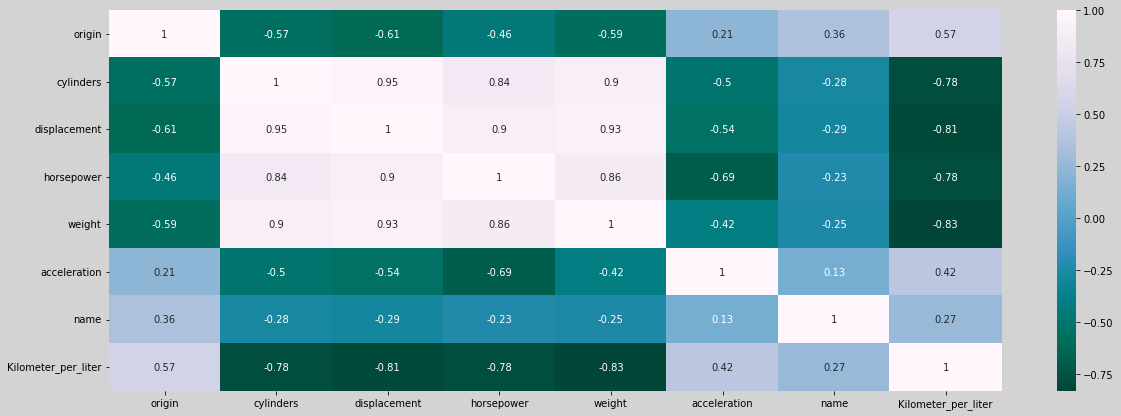

In [427]:
plt.figure(figsize=(20, 7),facecolor="lightgrey",frameon=True,edgecolor='blue') 
sns.heatmap(x_corr, annot=True, cmap='PuBuGn_r');
plt.show()

<Figure size 1440x504 with 0 Axes>

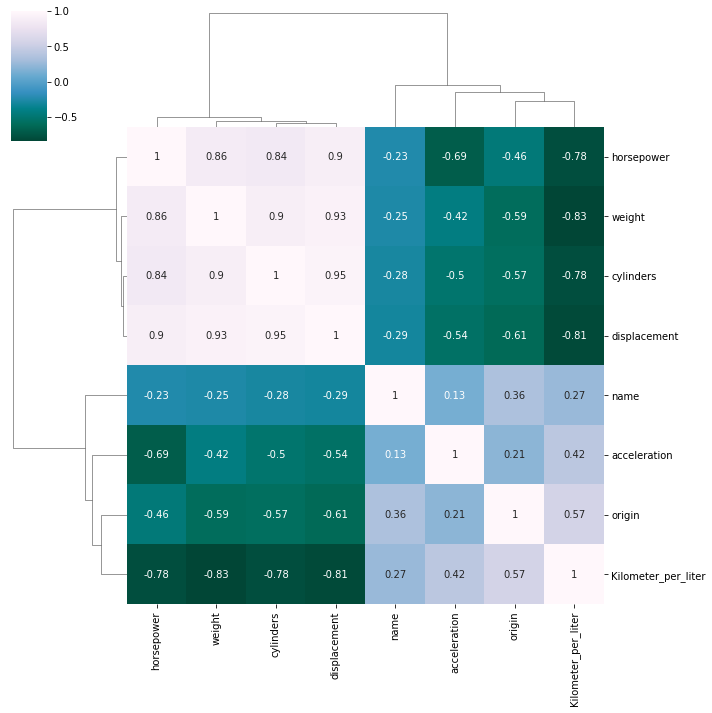

In [428]:
plt.figure(figsize=(20, 7),facecolor="lightgrey",frameon=True,edgecolor='blue')
sns.clustermap(x_corr, annot=True, cmap='PuBuGn_r');

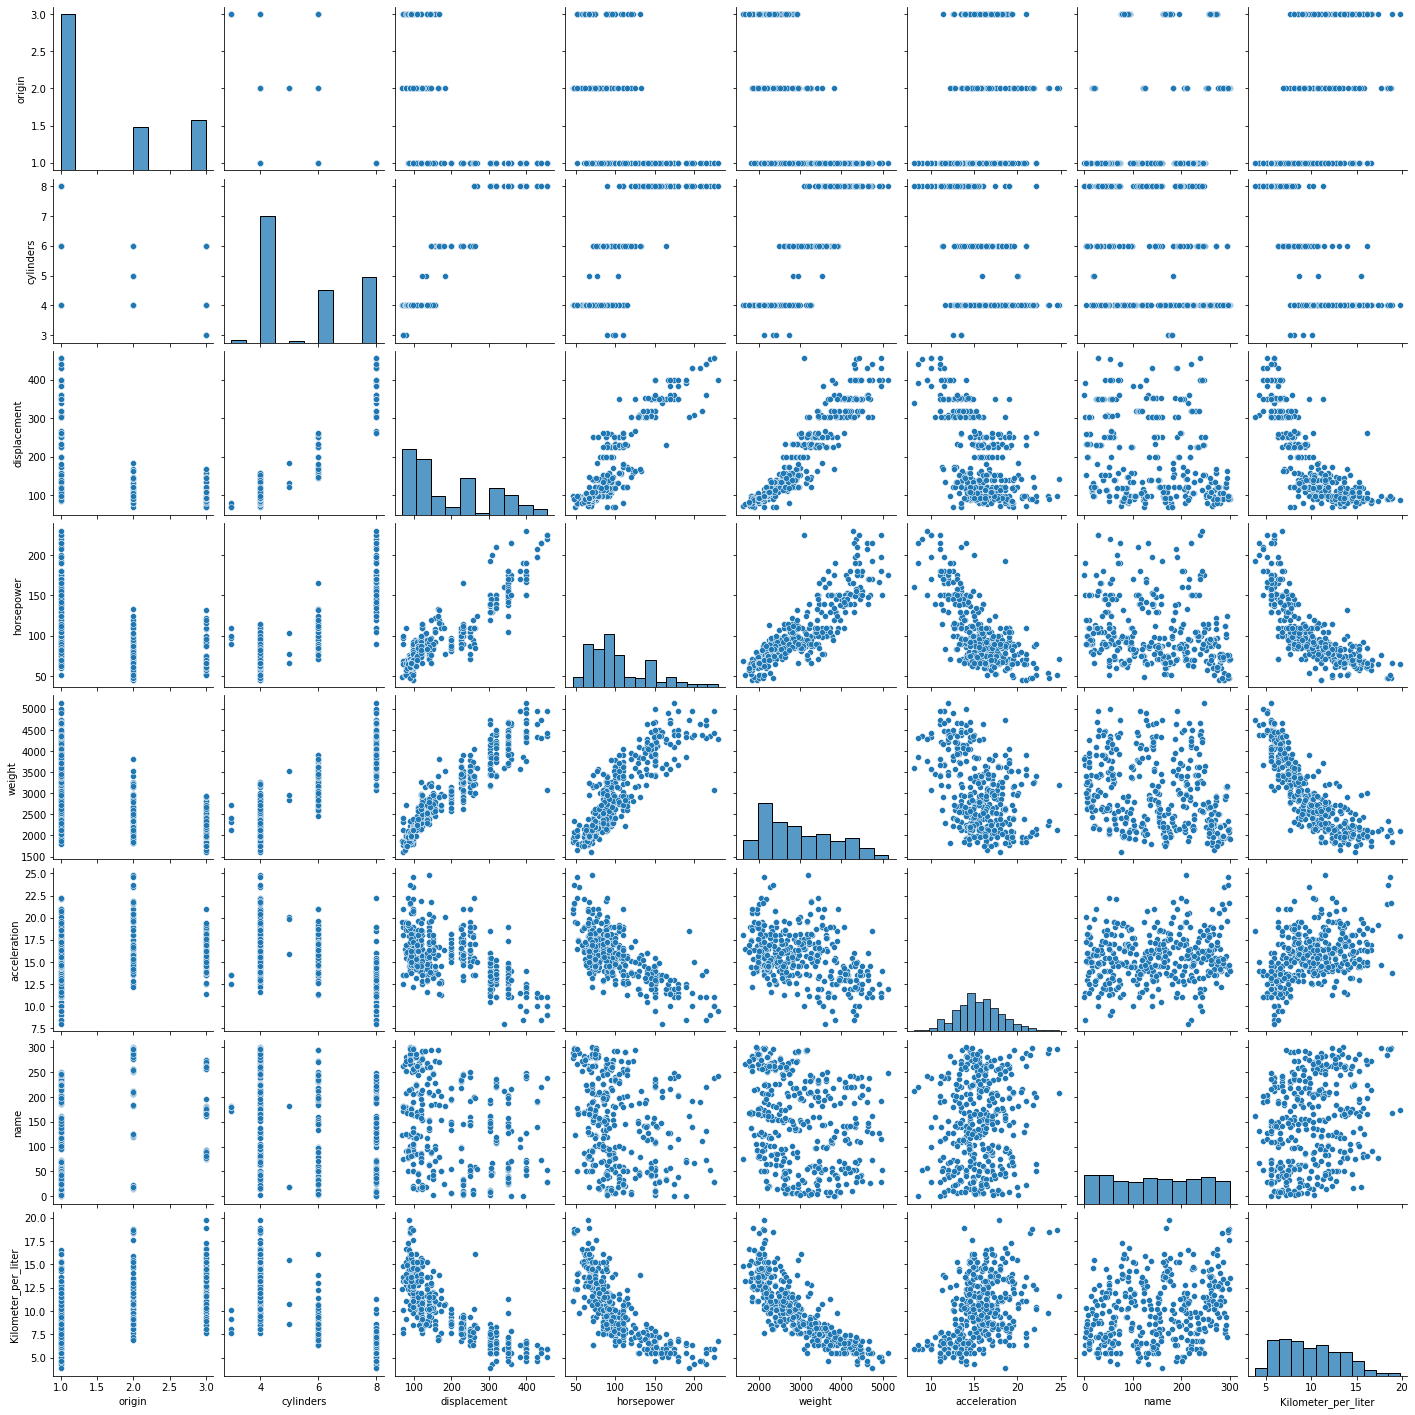

In [429]:
sns.pairplot(df);

# visualization using seaborn

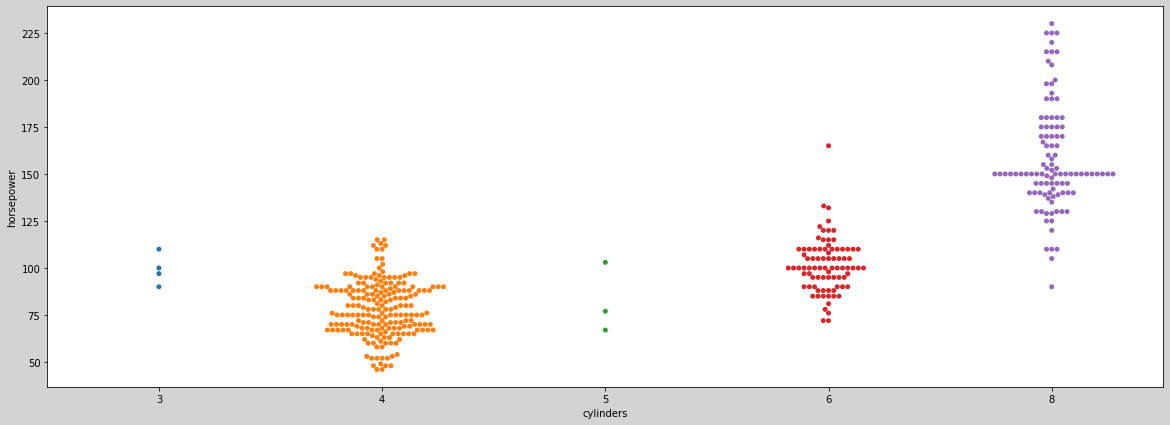

In [430]:
plt.figure(figsize=(20, 7),facecolor="lightgrey",frameon=True,edgecolor='blue')
sns.swarmplot(df['cylinders'],df['horsepower']);

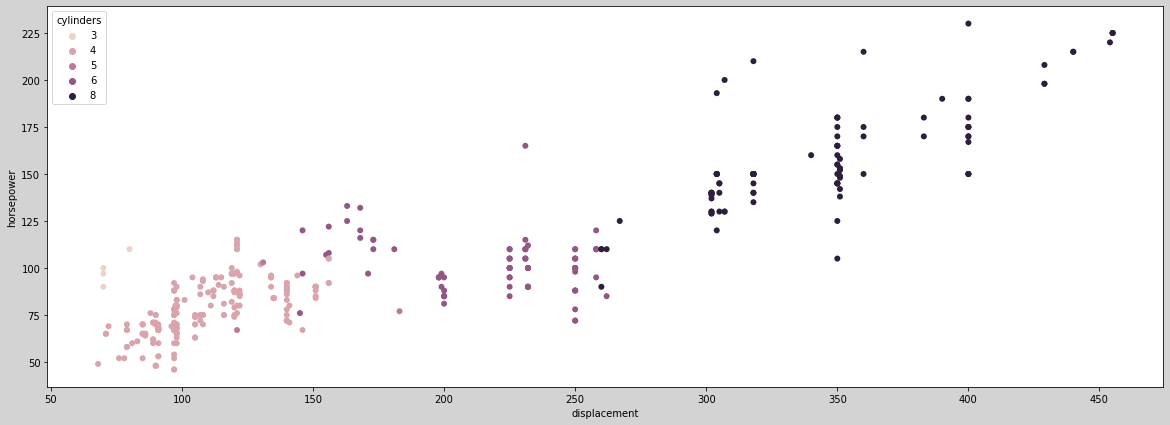

In [431]:
plt.figure(figsize=(20, 7),facecolor="lightgrey",frameon=True,edgecolor='blue')
sns.scatterplot(x="displacement", y="horsepower",hue="cylinders",linewidth=0,data=df);

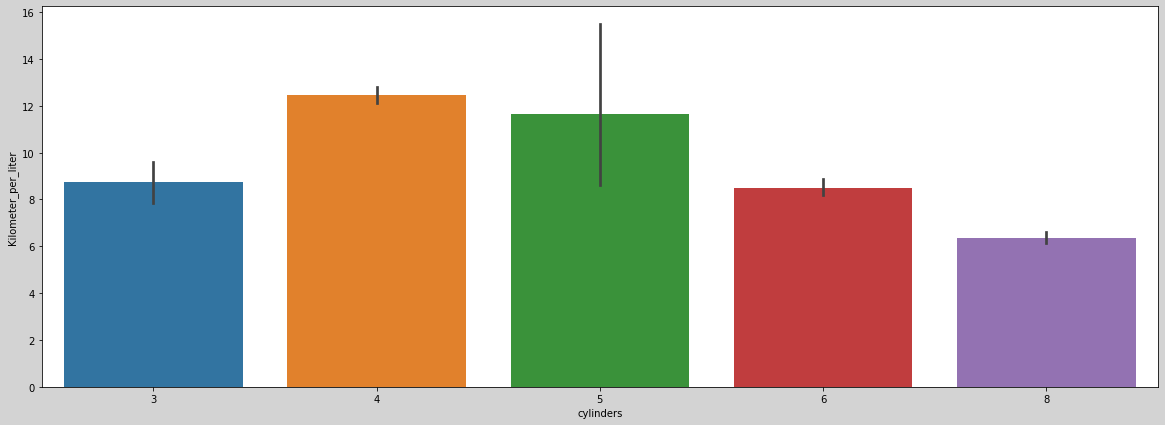

In [432]:
plt.figure(figsize=(20, 7),facecolor="lightgrey",frameon=True,edgecolor='blue')
sns.barplot(x='cylinders', y='Kilometer_per_liter', data=df);

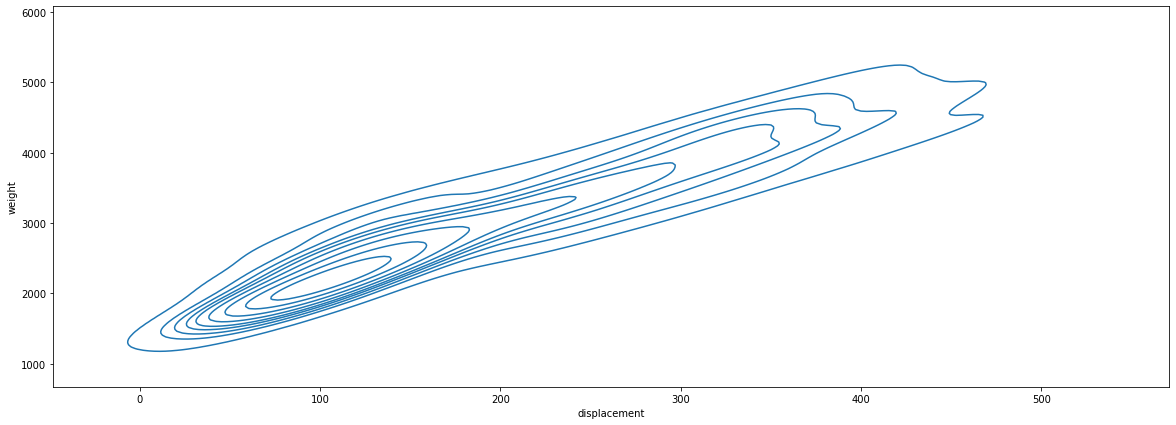

In [433]:
plt.figure(figsize=(20, 7))
sns.kdeplot(x='displacement', y='weight', data=df);

## DISTINGUISHING CONTINOUS AND CATEGORICAL FIELDS

In [434]:
cat_cols = df.select_dtypes(include = 'object')
num_cols =df.select_dtypes(include = np.number)
print('Continuous variables are : ',num_cols.columns)
print('Categorical Columns are : ',cat_cols.columns)

Continuous variables are :  Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'name', 'Kilometer_per_liter'],
      dtype='object')
Categorical Columns are :  Index([], dtype='object')


## USING BOXPLOT TO FIND OUTLIERS 

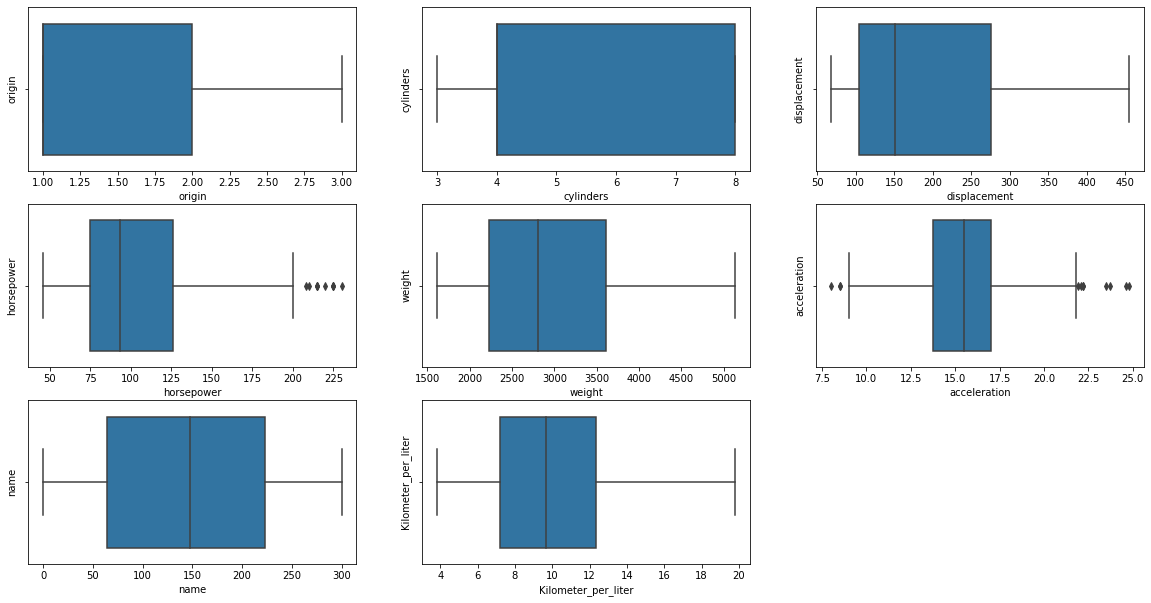

In [435]:
plt.figure(figsize=(20,50))
for i,col in enumerate(num_cols,1):
     plt.subplot(14,3,i)
     sns.boxplot(df[col])
     plt.ylabel(col)
plt.show()

# outliers removal using IQR

In [436]:
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
     
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
     
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] 
    if ((x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
 
 
for i in df.columns:
    removeOutliers(df, i)
 
# Assigning filtered data back to our original variable
data = filtered_data
print("Shape of data after outlier removal is: ", data.shape)

IQR value for column origin is: 1.0
IQR value for column cylinders is: 4.0
IQR value for column displacement is: 170.75
IQR value for column horsepower is: 51.0
IQR value for column weight is: 1389.5
IQR value for column acceleration is: 3.2499999999999964
IQR value for column name is: 159.5
IQR value for column Kilometer_per_liter is: 5.101724489163262
Shape of data after outlier removal is:  (392, 8)


In [437]:
df.shape

(392, 8)

# creating target and response variable for model building

In [438]:
y_dep=df.Kilometer_per_liter
x_ind=df.drop("Kilometer_per_liter",axis=1)

# NORMALIZATION OF RESPONSE VARIABLE

In [439]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()

In [440]:
x_norm=norm.fit_transform(x_ind)

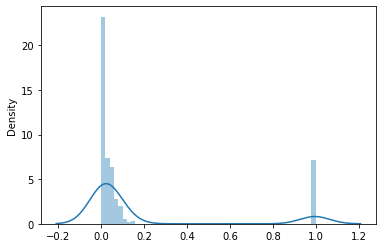

In [441]:
sns.distplot(x_norm);

# model data selection for train and validation phase

In [442]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_ind,y_dep, test_size = 0.2,random_state=1)

# BUILDING OLS MODEL TO CHECK MODEL SUMMARY

In [443]:
import statsmodels.api as sm 
model=sm.OLS(y_dep,x_ind) 
my_fit=model.fit() 
my_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Kilometer_per_liter   R-squared (uncentered):                   0.954
Model:                             OLS   Adj. R-squared (uncentered):              0.953
Method:                  Least Squares   F-statistic:                              1147.
Date:                 Sat, 23 Oct 2021   Prob (F-statistic):                   1.99e-253
Time:                         20:42:02   Log-Likelihood:                         -873.61
No. Observations:                  392   AIC:                                      1761.
Df Residuals:                      385   BIC:                                      1789.
Df Model:                            7                                                  
Covariance Type:             nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
origin           1.1322      0.190      5.961      0.000       0.759       1.506
cylinders        0.7175      0.206      3.478      0.001       0.312       1.123
displacement    -0.0117      0.005     -2.380      0.018      -0.021      -0.002
horsepower       0.0347      0.008      4.496      0.000       0.020       0.050
weight          -0.0025      0.000     -5.798      0.000      -0.003      -0.002
acceleration     0.6391      0.041     15.477      0.000       0.558       0.720
name             0.0029      0.001      2.094      0.037       0.000       0.006
==============================================================================
Omnibus:                       13.618   Durbin-Watson:                   1.142
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.771
Skew:                           0.336   Prob(JB):                     0.000228
Kurtosis:                       3.759   Cond. No.                     5.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# BUILDING LINEAR REGRESSION

Although response variable is correlated,by visualization in pairplot I can to know that we can fit our linear line and covers more data points  

In [444]:
from sklearn.linear_model import LinearRegression

In [445]:
model = LinearRegression() 
model.fit(x_train, y_train) 
y_pred = model.predict(x_test) 
y_pred

array([11.92712466, 13.07106392, 12.7532393 , 10.29313042, 13.3951046 ,
       11.69077606, 12.59485064,  6.0812359 , 12.26879426, 12.83141911,
        8.88753883, 12.50984049,  7.1264191 , 13.43955365, 10.83431959,
        7.69818551, 11.0858373 , 12.94579192,  4.2236907 ,  9.63911648,
       12.15119088,  8.07417619,  7.56128018,  5.58356488,  4.82031863,
        6.56485939, 13.42871063,  8.29023401,  9.16644002, 11.19585778,
        7.58224622, 10.51977958,  5.26711922,  9.6524685 ,  8.55033687,
        6.10065287,  8.30014788,  8.62088349, 13.52261033, 12.63328891,
        4.94220426,  5.35266078, 10.6487815 ,  9.66628737,  9.86760026,
        7.8997793 ,  4.53234868, 13.55912883,  9.22845961,  3.61169906,
        6.87161679,  9.30558168, 10.38564004, 11.22458669, 13.39946961,
        9.57298555,  9.75831376, 10.73117835, 10.77786692, 14.04845402,
       10.08077134, 11.48015627, 13.53500316,  8.61875372,  9.56149442,
        9.30045411, 10.08350216,  7.00658698, 13.03082977,  3.90

In [446]:
f_comp = pd.DataFrame({"Actual": y_test, "M_Predicted": y_pred}) 
f_comp.head()

,Actual,M_Predicted
82,9.778305,11.927125
167,12.329168,13.071064
356,13.774656,12.753239
120,8.077730,10.293130
385,16.155461,13.395105


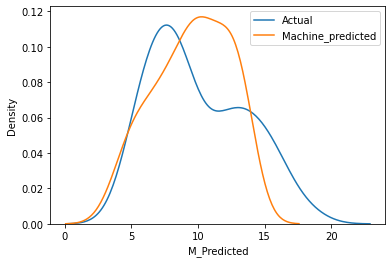

In [447]:
sns.distplot(f_comp['Actual'], hist=False) 
sns.distplot(f_comp['M_Predicted'], hist=False) 
plt.legend(['Actual', 'Machine_predicted']) 
plt.show()

In [448]:
model.score(x_test, y_test) *100

72.33618408728239

In [449]:
model.intercept_

16.772640260870983

In [450]:
model.coef_

array([ 0.60669984, -0.07711331,  0.0021106 , -0.02287296, -0.00200322,
        0.02191845,  0.00112905])

# Residual 

In [451]:
Res=y_pred-y_test
Res.head()

82     2.148819
167    0.741896
356   -1.021417
120    2.215400
385   -2.760356
Name: Kilometer_per_liter, dtype: float64

In [452]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, y_pred)
mse

3.466222247672915

In [453]:
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
rms

1.8617793230329194

In [454]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('r2 score for linear model is', r2 *100)

r2 score for linear model is 72.33618408728239


# Assumptions in Linear Regression

# Linearity 
# Homoscedastic
# no Autocorrelation
# Normality (error check )
# Multicollinearity

((array([-2.37663702, -2.02958204, -1.82767017, -1.68081377, -1.5632274 ,
         -1.46398099, -1.37736584, -1.30000518, -1.22972736, -1.16504879,
         -1.10490843, -1.04851956, -0.99528161, -0.94472489, -0.89647454,
         -0.8502261 , -0.80572849, -0.76277189, -0.72117887, -0.68079772,
         -0.64149747, -0.60316407, -0.5656973 , -0.52900844, -0.49301835,
         -0.45765594, -0.4228569 , -0.38856265, -0.35471952, -0.32127797,
         -0.288192  , -0.25541861, -0.22291736, -0.19064996, -0.15857989,
         -0.12667214, -0.09489286, -0.06320916, -0.0315888 ,  0.        ,
          0.0315888 ,  0.06320916,  0.09489286,  0.12667214,  0.15857989,
          0.19064996,  0.22291736,  0.25541861,  0.288192  ,  0.32127797,
          0.35471952,  0.38856265,  0.4228569 ,  0.45765594,  0.49301835,
          0.52900844,  0.5656973 ,  0.60316407,  0.64149747,  0.68079772,
          0.72117887,  0.76277189,  0.80572849,  0.8502261 ,  0.89647454,
          0.94472489,  0.99528161,  1.

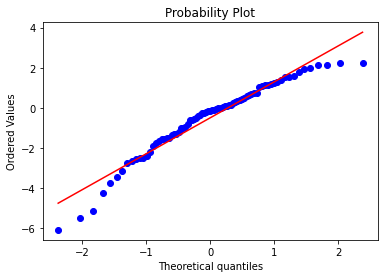

In [455]:
#Normality (error check)
import scipy.stats as st
st.probplot(Res,dist="norm",plot=plt)

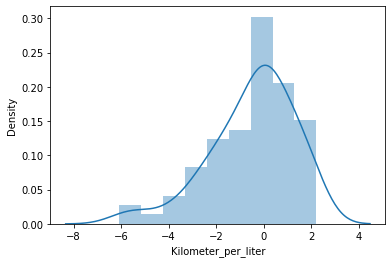

In [456]:
sns.distplot(Res);

# Homoscedastic

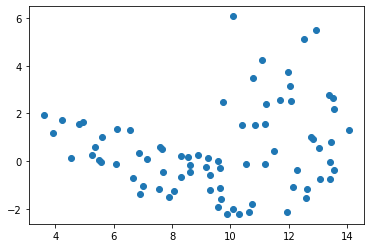

In [457]:
plt.plot(y_pred,y_test-y_pred,'o');

In [458]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(my_fit.resid, my_fit.model.exog)

lzip(names, test)


[('Lagrange multiplier statistic', 128.23536258842597),
 ('p-value', 3.0235356231500926e-25),
 ('f-value', 26.73953950604125),
 ('f p-value', 7.487140286619615e-30)]

The null hypothesis (H0): Homoscedasticity is present.

The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)

# No Autocorrelation

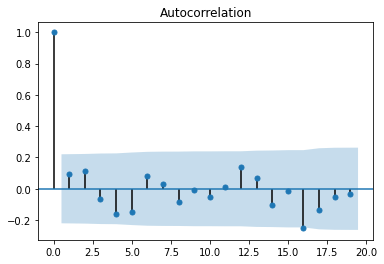

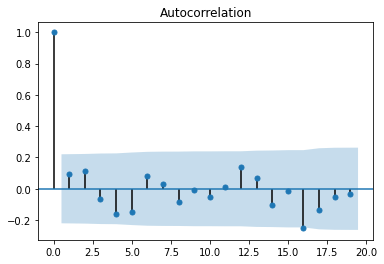

In [459]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(y_pred-y_test)

#  Multicollinearity

In [460]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vifm

In [461]:
def calculate_vif(x):
    vif=pd.DataFrame()
    vif['features']=x.columns
    vif['VIF_Values']=[vifm(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [462]:
calculate_vif(df)

,features,VIF_Values
0,origin,9.410982
1,cylinders,109.915520
2,displacement,91.225624
3,horsepower,59.178123
4,weight,152.325078
5,acceleration,52.546568
6,name,4.348903
7,Kilometer_per_liter,21.851154


# THE PREDICTED LINEAR MODEL HAS ACCURACY OF 72%

In [463]:
from sklearn.preprocessing import PolynomialFeatures

In [464]:
 poly = PolynomialFeatures(degree = 2)

In [465]:
x_poly = poly.fit_transform(x_train)

In [466]:
lin2 = LinearRegression()

In [467]:
lin2.fit(x_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [468]:
y_pred_poly=lin2.predict(poly.fit_transform(x_test))

In [469]:
y_pred_poly

array([10.54098006, 12.70064167, 12.84239316,  8.86522272, 14.78358333,
       12.54453388, 11.97495577,  6.17322707, 11.27839601, 13.70456291,
        8.08947754, 12.40064505,  6.80712229, 14.05125721, 10.96615126,
        7.43883562, 12.24666655, 14.66159106,  5.89485661,  7.93377556,
       12.19702488,  7.22152365,  6.99214074,  6.22299007,  5.78124022,
        6.37469336, 14.32069691,  7.89284509,  7.79831346, 12.87179437,
        6.6726987 , 10.79264608,  6.16884545,  7.66721835,  7.82026088,
        6.28358307,  8.2648299 ,  8.10308268, 14.22354665, 12.19519798,
        5.52634917,  5.99346064,  9.58763265,  7.92252108,  8.01915871,
        7.32067804,  5.95832593, 13.95800047,  8.51585141,  5.3473408 ,
        6.89186653,  8.6688432 , 10.01600965, 13.06803379, 13.41173087,
        9.74622047, 10.24692909,  9.11551767, 11.93938749, 15.32490125,
        7.3108686 , 10.91516043, 15.08766145,  7.90323124,  8.17999639,
        8.1895688 ,  9.87367157,  8.18774921, 13.24638855,  5.70

In [470]:
f_comp1 = pd.DataFrame({"Actual": y_test, "M_Predicted": y_pred_poly}) 
f_comp1.head()

,Actual,M_Predicted
82,9.778305,10.540980
167,12.329168,12.700642
356,13.774656,12.842393
120,8.077730,8.865223
385,16.155461,14.783583


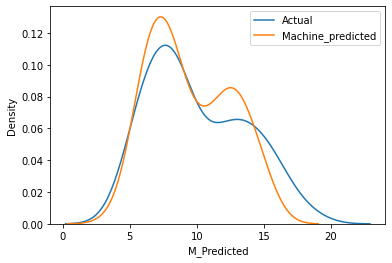

In [471]:
sns.distplot(f_comp1['Actual'], hist=False) 
sns.distplot(f_comp1['M_Predicted'], hist=False) 
plt.legend(['Actual', 'Machine_predicted']) 
plt.show()

In [472]:
lin2.intercept_

-3306520.4449700466

In [473]:
lin2.coef_

array([ 3.30656198e+06, -7.23375534e+00, -5.18023714e-01, -1.93801272e-01,
        7.65046985e-02,  5.10662265e-03, -2.01702273e+00,  3.60709394e-03,
        1.42503067e+00,  3.58934389e-01,  5.19098179e-02, -5.10695557e-02,
       -1.33625409e-03,  1.69445043e-01, -5.78323114e-03, -2.48233323e-01,
        1.93468716e-02, -4.14919110e-03, -8.56307263e-04,  1.37702647e-01,
        1.25888001e-03, -6.55618401e-05,  6.65475037e-05,  4.61399753e-06,
        5.09706529e-04, -1.33446223e-05, -1.67152521e-04,  1.26428793e-05,
       -2.83610110e-03, -5.64934344e-07, -1.04710634e-07,  7.19169995e-06,
       -2.34153008e-06,  3.29936534e-02, -6.88781172e-05,  2.98209886e-05])

In [474]:
from sklearn.metrics import mean_squared_error
mse_poly=mean_squared_error(y_test, y_pred_poly)
mse_poly

2.8618202435432676

In [475]:
from math import sqrt
rms_poly = sqrt(mean_squared_error(y_test, y_pred_poly))
rms_poly

1.6916915332126208

In [476]:
from sklearn.metrics import r2_score
r2_poly = r2_score(y_test, y_pred_poly)
print('r2 score for polynomial model is', r2_poly *100)

r2 score for polynomial model is 77.15989837471604


Why do we need Polynomial Regression?


		* We fit our model and notice it performs badly.


		* We see that actual line and best fit, actual value has kind of curve.


		* That’s where, polynomial Regression comes to the play, it predicts the best fit line that follows the pattern(curve) of the data

        * Polynomial Regression is generally used when the points in the data are not captured by the Linear Regression Model.

**As we increase the degree in the model, it tends to increase the performance of the model.** 

In [481]:
data = {'MSE':[mse,mse_poly],'RMS':[rms,rms_poly],'ACCURACY':[r2*100,r2_poly*100]}
df = pd.DataFrame(data)
df = pd.DataFrame(data, index=['LINEAR_REGRESSION','POLYNOMIAL_REGRESSION'])
df

,MSE,RMS,ACCURACY
LINEAR_REGRESSION,3.466222,1.861779,72.336184
POLYNOMIAL_REGRESSION,2.861820,1.691692,77.159898
